# Project: WordCloud


This script creates a "word cloud" from an uploaded text. It processes the text to remove punctuation, ignore case and words that do not contain all alphabets, count the frequencies, and ignore uninteresting or irrelevant words.

The `wordcloud` module will then be used to generate the word cloud image.

For the input text, you will need to provide a file that contains text only. For the text itself, you can copy and paste the contents of a website you like. Or you can use a site like [Project Gutenberg] (https://www.gutenberg.org/) to find books that are available online. You could see what word clouds you can get from famous books, like a Shakespeare play or a novel by Jane Austen. Save this as a .txt file somewhere on your computer.

## Step 1

Run the following cell to perform all the installs and imports for the word cloud script and uploader widget. It may take a minute for all of this to run and there will be a lot of output messages. But, be patient. Once you get the following final line of output, the code is done executing. Then you can continue on with the rest of the instructions for this notebook.

In [5]:
!pip install wordcloud
!pip install fileupload
!pip install ipywidgets
!jupyter nbextension install --py --user fileupload
!jupyter nbextension enable --py fileupload

import wordcloud
import numpy as np
from matplotlib import pyplot as plt
from IPython.display import display
import fileupload
import io
import sys

from PIL import Image
from os import path

Installing /Library/Frameworks/Python.framework/Versions/3.8/lib/python3.8/site-packages/fileupload/static -> fileupload
Up to date: /Users/abdullahk047/Library/Jupyter/nbextensions/fileupload/widget.js
Up to date: /Users/abdullahk047/Library/Jupyter/nbextensions/fileupload/extension.js
Up to date: /Users/abdullahk047/Library/Jupyter/nbextensions/fileupload/fileupload/widget.js
- Validating: OK

    To initialize this nbextension in the browser every time the notebook (or other app) loads:
    
          jupyter nbextension enable fileupload --user --py
    
Enabling notebook extension fileupload/extension...
      - Validating: OK


All of the installs and imports for our word cloud script and uploader widget have been completed. 
<br><br>
**IMPORTANT!** If this was your first time running the above cell containing the installs and imports, you will need save this notebook now. Then under the File menu above,  select Close and Halt. When the notebook has completely shut down, reopen it. This is the only way the necessary changes will take affect.
<br><br>
## Step 2

To upload your text file, run the following cell that contains all the code for a custom uploader widget. Once you run this cell, a "Browse" button should appear below it. Click this button and navigate the window to locate your saved text file.

In [6]:
# This is the uploader widget

def _upload():

    _upload_widget = fileupload.FileUploadWidget()

    def _cb(change):
        global file_contents
        decoded = io.StringIO(change['owner'].data.decode('utf-8'))
        filename = change['owner'].filename
        print('Uploaded `{}` ({:.2f} kB)'.format(
            filename, len(decoded.read()) / 2 **10))
        file_contents = decoded.getvalue()

    _upload_widget.observe(_cb, names='data')
    display(_upload_widget)

_upload()


FileUploadWidget(label='Browse', _dom_classes=('widget_item', 'btn-group'))

Uploaded `62187-0.txt` (39.93 kB)


The uploader widget saved the contents of your uploaded file into a string object named *file_contents* that the word cloud script can process. This was a lot of preliminary work, but we are now ready to process this text. 

## Step 3

In the cell below, function `calculate_frequencies` iterates through the words in *file_contents*, removes punctuation, and counts the frequency of each word.  It ignores word case, words that do not contain all alphabets and boring words like "and" or "the".  Finally it is used in the `generate_from_frequencies` function to generate your very own word cloud!

Run the cell to process the text.

In [51]:
def calculate_frequencies(file_contents):
    # Here is a list of punctuations and uninteresting words you can use to process your text
    punctuations = '''!()-[]{};:'"\,<>./?@#$%^&*_~'''
    uninteresting_words = ["the", "a", "to", "if", "is", "it", "of", "and", "or", "an", "as", "i", "me", "my", \
    "we", "our", "ours", "you", "your", "yours", "he", "she", "him", "his", "her", "hers", "its", "they", "them", \
    "their", "what", "which", "who", "whom", "this", "that", "am", "are", "was", "were", "be", "been", "being", \
    "have", "has", "had", "do", "does", "did", "but", "at", "by", "with", "from", "here", "when", "where", "how", \
    "all", "any", "both", "each", "few", "more", "some", "such", "no", "nor", "too", "very", "can", "will", "just", \
    "in", "not", "for", "other", "may", "on", "full", "shall", "must", "about", "use", "so"]
    
    # LEARNER CODE START HERE
    
    words_dict = {}
    
    for char in file_contents:
      if not (char.isalpha() or char == " "):
        file_contents = file_contents.replace(char, "")
        
    file_contents = file_contents.lower()
    
    words_list = file_contents.split()
     
    words_list = (wrd for wrd in words_list if (wrd not in uninteresting_words))
    
    for word in words_list:
      if word not in words_dict:
        words_dict[word] = 0
      words_dict[word] += 1
    
    
    
    #wordcloud
    currdir = path.dirname("WordCloud.ipynb")
    
    mask = np.array(Image.open(path.join(currdir, "cloud.png")))
    
    cloud = wordcloud.WordCloud(background_color="white", mask=mask)
    cloud.generate_from_frequencies(words_dict)
    return cloud.to_array()

## Step 4

If you have done everything correctly, your word cloud image should appear after running the cell below.  Fingers crossed!

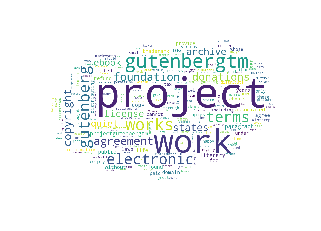

In [53]:
# Display your wordcloud image

myimage = calculate_frequencies(file_contents)
plt.imshow(myimage, interpolation = 'nearest')
plt.axis('off')
#plt.figure(figsize=(1080/96, 720/96), dpi=96)
plt.show()